In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:

customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the _PE8_ (snake case), (# Lab | Cleaning numerical data) 

In [6]:
customer_df= customer_df.rename(columns=str.lower)
customer_df.columns = customer_df. columns. str. replace(' ','_')
customer_df.head(5)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


dropping customer (# Lab | Cleaning numerical data) 

In [7]:
customer_df=customer_df.drop(columns=['customer'])

Change effective to date column to datetime format (# Lab | Cleaning numerical data)

In [8]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')


Check `NaN` values per column(# Lab | Cleaning numerical data)

In [9]:
customer_df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Define a function that differentiates between continuous and discrete variables and get categorical features. (# Lab | Cleaning numerical data)

In [10]:
customer_df['income'] = customer_df['income'].astype(float)
numerical=customer_df.select_dtypes(include=[np.number])
categorical=customer_df.select_dtypes(include=[np.object])

df_cat = pd.DataFrame()
df_discr = pd.DataFrame()
df_cont = pd.DataFrame()

def diff_concr_discr_cat(x):
    
    for i in x:
        if customer_df[i].dtype == 'object':
            df_cat[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64':
            df_discr[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            df_cont[i] = customer_df[i]

diff_concr_discr_cat(list(customer_df.columns))


Plot a correlation matrix, what can you see? (# Lab | Cleaning categorical data)
There is not a lot of correlation between numerical categories

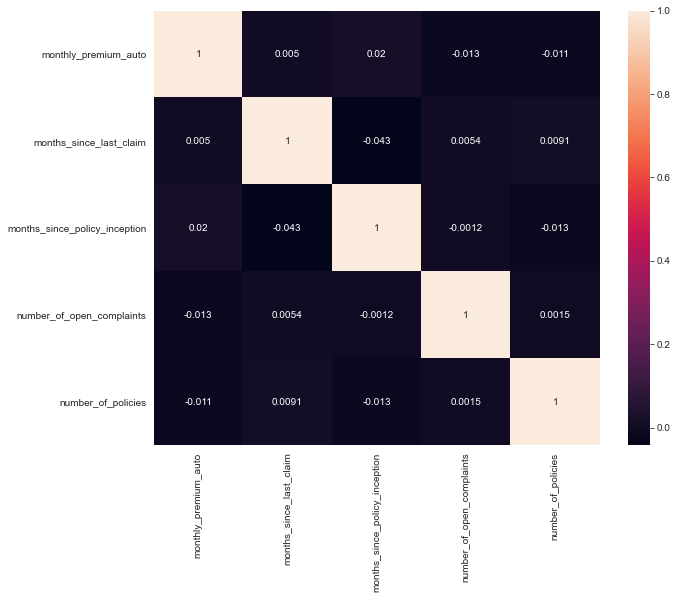

In [11]:
corr_matrix=df_discr.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

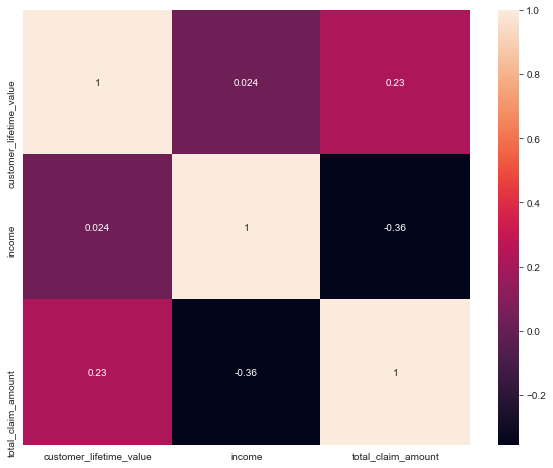

In [12]:
corr_matrix=df_cont.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

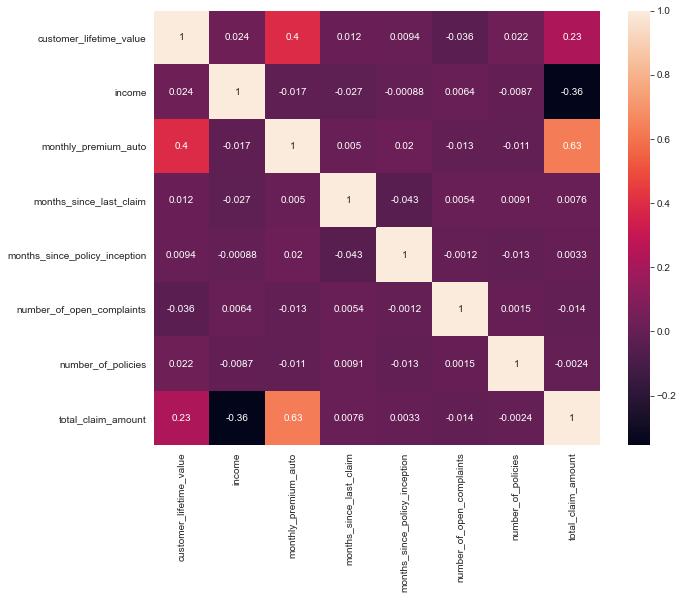

In [13]:
corr_matrix=numerical.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

Create a function to plot every discrete variables. Do the same with continuous variables (# Lab | Cleaning categorical data)

In [14]:
def cont_plot(df):
    cols=list(df.columns)
    
    for col in cols:
        sns.boxplot(df[col])
        plt.show()


In [15]:
def dis_plot(df):
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()


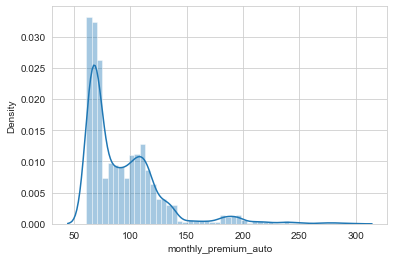

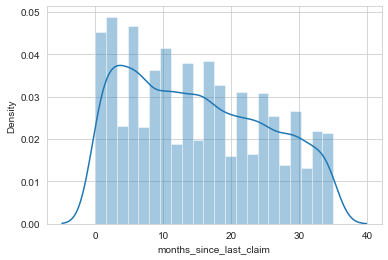

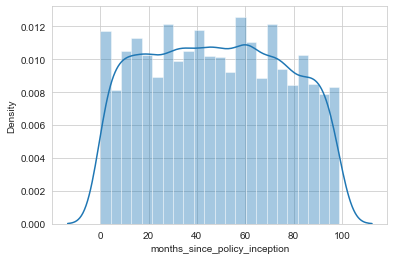

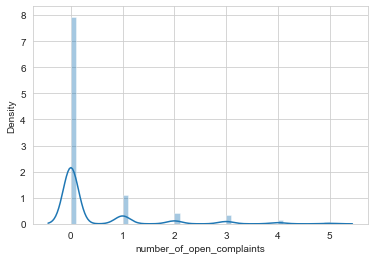

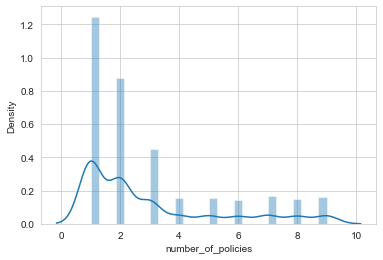

In [16]:
dis_plot(df_discr)

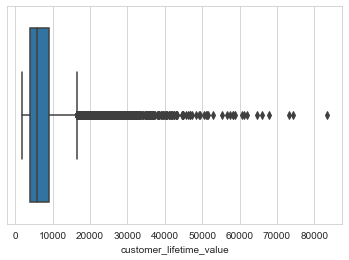

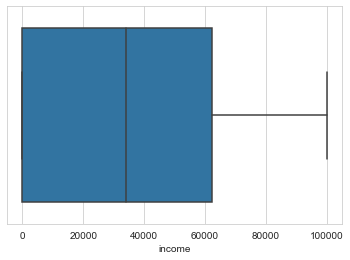

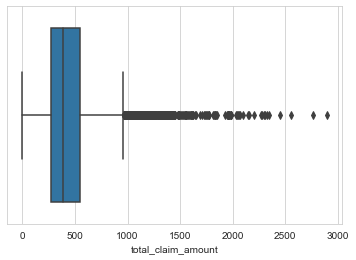

In [17]:
cont_plot(df_cont)

In [18]:
df_discr=df_discr.drop(columns=['number_of_open_complaints'])

Have you found outliers? If you have, what should we do with them? (# Lab | Cleaning categorical data)

In [19]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later


In [20]:
def dis_log(df):
    cols=list(df.columns)
    
    for col in cols:
        df[col] = list(map(log_transfom_clean_, df[col]))
        


In [21]:
dis_log(df_discr)

In [22]:
dis_log(df_cont)

Seeing plots after log transform (Lab Random variable distributions)

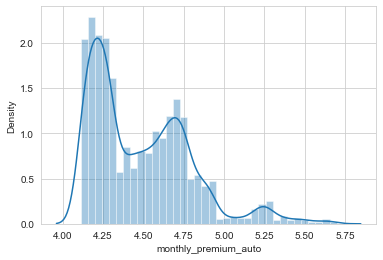

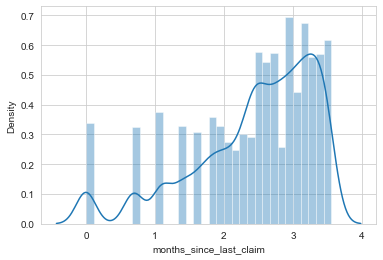

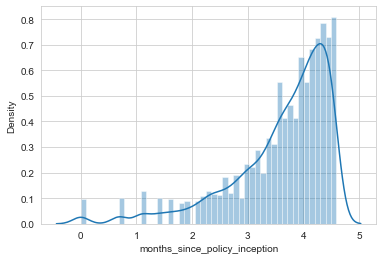

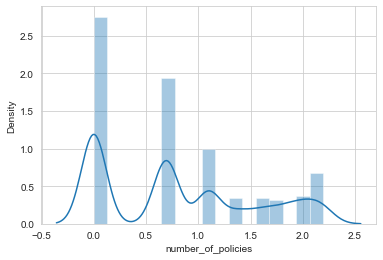

In [49]:
dis_plot(df_discr)

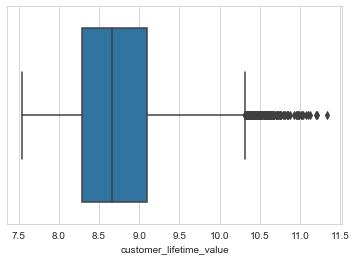

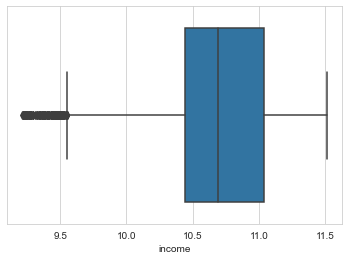

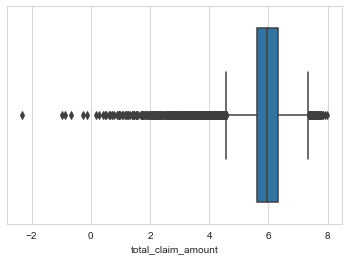

In [50]:
cont_plot(df_cont)

Check nan values per column. (# Lab | Cleaning categorical data)

In [23]:
df_discr.isna().sum()

monthly_premium_auto               0
months_since_last_claim          314
months_since_policy_inception     83
number_of_policies                 0
dtype: int64

In [24]:
df_cont.isna().sum()

customer_lifetime_value       0
income                     2317
total_claim_amount            0
dtype: int64

In [25]:
df_cont['income'] = df_cont['income'].fillna(np.mean(df_cont['income']))

In [26]:
df_discr['months_since_last_claim'] = df_discr['months_since_last_claim'].fillna(np.mean(df_discr['months_since_last_claim']))
df_discr['months_since_policy_inception'] = df_discr['months_since_policy_inception'].fillna(np.mean(df_discr['months_since_policy_inception']))

Plot all the categorical variables with the proper plot (Lab | Feature extraction)

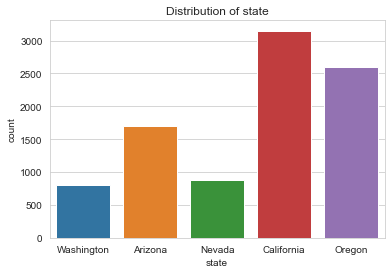

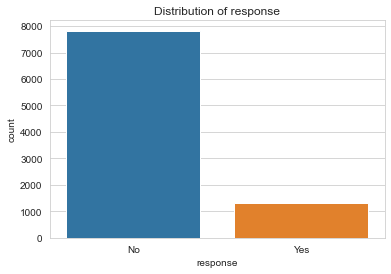

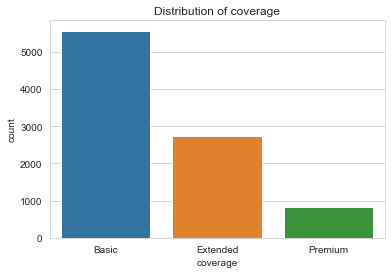

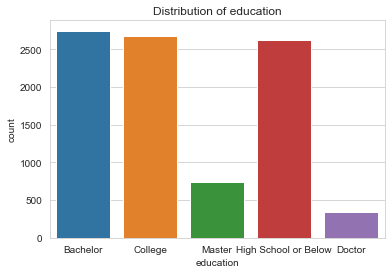

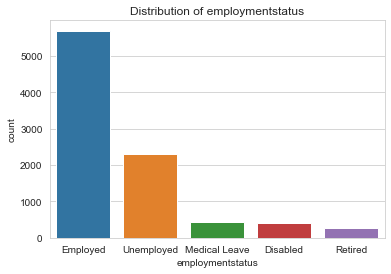

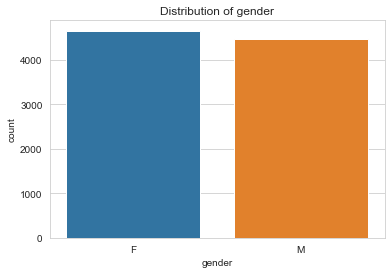

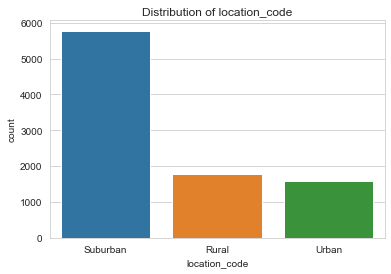

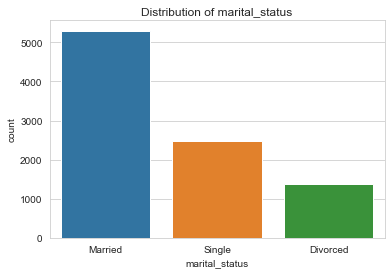

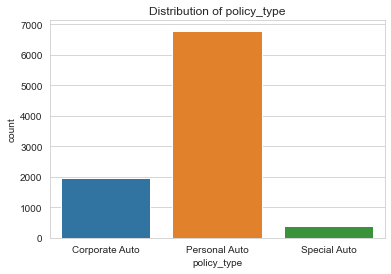

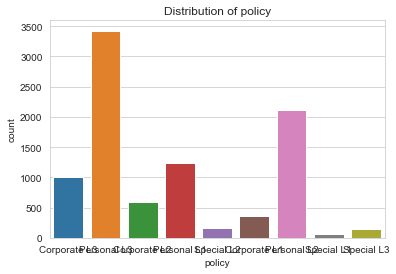

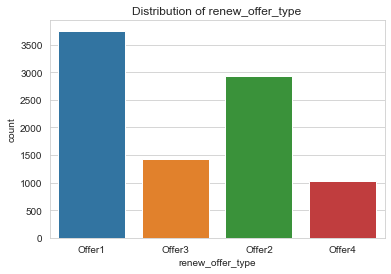

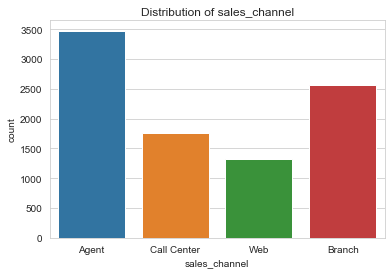

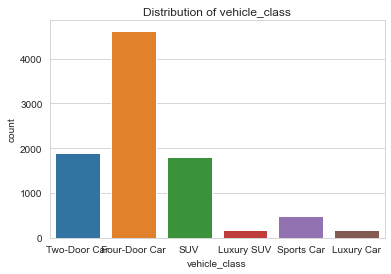

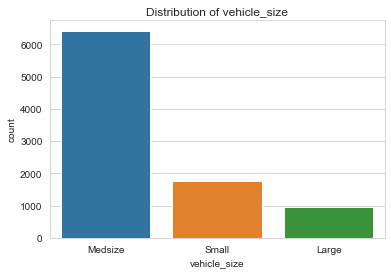

In [27]:
def plot_cats(df):
    for i in df.columns:
        plt.figure()
        sns.countplot(x=i,data=df).set_title('Distribution of {}'.format(i))
plot_cats(df_cat)


In [28]:
df_cat=df_cat.drop(columns=['gender','response','education'])

Plot time variable. Can you extract something from it?(Lab | Feature extraction)

<function matplotlib.pyplot.show(close=None, block=None)>

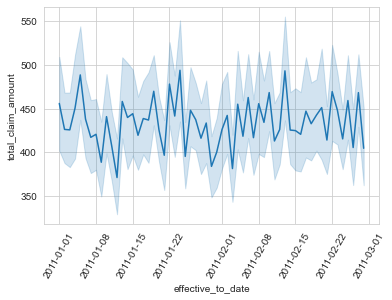

In [29]:
sns.lineplot(data=customer_df, x="effective_to_date", y="total_claim_amount")
plt.xticks(rotation=60)
plt.show


Deal with Categorical Data columns Lab  (Data cleaning and wrangling)

In [30]:
import re
def clean_words(x):
    pattern = '^\S*'
    if re.search(pattern, x):
        pos = re.search(pattern, x).end()
        return x[:pos]
    else:
        x = wrong
        return 'other'


In [31]:
df_cat['policy']=df_cat['policy'].apply(clean_words)

In [32]:
def employment(x):
    if 'mployed' not in x:
        return 'Other'
    else:
        return x


In [33]:
df_cat['employmentstatus']=df_cat['employmentstatus'].apply(employment)

In [34]:
vals = pd.DataFrame(df_cat['vehicle_class'].value_counts())
vals = vals.reset_index()
vals.columns = ['vehicle_class', 'counts']
group_vehicle_class_df = vals[vals['counts']<1000]
group_vehicle_class = list(group_vehicle_class_df['vehicle_class'])
group_vehicle_class

['Sports Car', 'Luxury SUV', 'Luxury Car']

In [35]:
def clean_vehicle_class(x):
    if x in group_vehicle_class:
        return 'Luxury'
    else:
        return x

df_cat['vehicle_class'] = list(map(clean_vehicle_class, df_cat['vehicle_class']))

In [36]:
dummies=df_cat[['state','marital_status','policy_type','vehicle_class','renew_offer_type','policy','sales_channel']]

In [37]:
df_cat_dummies = pd.get_dummies(dummies,drop_first = True)
df_cat.drop(dummies, axis=1, inplace = True)
df_cat=pd.concat([df_cat,df_cat_dummies],axis=1)

Splitting effective date (Data cleaning and wrangling)

In [38]:
import datetime

def get_months(x):
    x = x.strftime("%m")
    return x
def get_day(x):
    x = x.strftime("%j")
    return x
def get_week(x):
    x = x.strftime("%U")
    return x


In [39]:
customer_df['month'] = list(map(get_months, customer_df['effective_to_date']))
customer_df['day'] = list(map(get_day, customer_df['effective_to_date']))
customer_df['week'] = list(map(get_week, customer_df['effective_to_date']))

In [40]:

df_cat["coverage"] = df_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
df_cat["employmentstatus"] = df_cat["employmentstatus"].map({"Employed" : 0, "Unemployed" : 1, "Other" : 2})
df_cat["location_code"] = df_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
df_cat["vehicle_size"] = df_cat["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [41]:
Clean_num=pd.concat([df_discr,df_cont],axis=1)

In [42]:

clean_customer_df=pd.concat([df_cat,Clean_num],axis=1)
customer_df2=customer_df[['day','week','month']]
customer_df2=customer_df2[['day','week','month']].astype(int)
clean_customer_df=pd.concat([customer_df2,clean_customer_df],axis=1)

In [43]:
clean_customer_df.isna().sum()

day                              0
week                             0
month                            0
coverage                         0
employmentstatus                 0
location_code                    0
vehicle_size                     0
state_California                 0
state_Nevada                     0
state_Oregon                     0
state_Washington                 0
marital_status_Married           0
marital_status_Single            0
policy_type_Personal Auto        0
policy_type_Special Auto         0
vehicle_class_Luxury             0
vehicle_class_SUV                0
vehicle_class_Two-Door Car       0
renew_offer_type_Offer2          0
renew_offer_type_Offer3          0
renew_offer_type_Offer4          0
policy_Personal                  0
policy_Special                   0
sales_channel_Branch             0
sales_channel_Call Center        0
sales_channel_Web                0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_

In [46]:
#from sklearn.neural_network import MLPRegressor
#from sklearn.datasets import make_regression



#regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
#regr.predict(X_test[:2])
#regr.score(X_test, y_test)

Lab | Comparing regression models

In [47]:
def models_predict(df,k,scaler): 
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import math
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import Normalizer
    #Split
    X = clean_customer_df.drop(clean_customer_df.columns[-1],axis=1)
    y = clean_customer_df[clean_customer_df.columns[-1:]]
    #Scaler
    if scaler=="StandardScaler":
        scaler_x = StandardScaler().fit(X)
        X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns)
        
    elif scaler=="MinMax":
        X_scaled = MinMaxScaler().fit_transform(X.values)
        X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
    elif scaler=="Normalizer":
        transformer = Normalizer().fit(X)
        X_scaled = pd.DataFrame(transformer.transform(X),columns=X.columns)
    elif scaler=="None": 
        X_scaled = X
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)
    #Linear Regression
    lm = LinearRegression()
    model = lm.fit(X_train,y_train)
    lpredictions  = lm.predict(X_test)
    lmse = mean_squared_error(y_test, lpredictions)
    lrmse = math.sqrt(lmse)
    lr2 = r2_score(y_test, lpredictions)
    lMAE = mean_absolute_error(y_test,lpredictions)
    lr2_adj = 1 - (1-lr2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    #KNN Model
    knn_model = KNeighborsRegressor(n_neighbors=k) 
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    KMAE = mean_absolute_error(y_test,knn_predictions)
    KMSE = mean_squared_error(y_test,knn_predictions)
    KRMSE = np.sqrt(KMSE)
    KR2 = r2_score(y_test,knn_predictions)
    KR2_adj = 1 - (1-KR2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    print("The mean absolute error of the Linear model in the test set is: %6.2f" % (lMAE))
    print("The mean squared error of the Linear model in the test set is: %6.2f" % (lmse))
    print("The root mean squared error of the Linear model in the test set is: %6.2f" % (lrmse))
    print("The R2 of the Linear model in the test set is: %4.2f" % (lr2))
    print("The Adjusted R2 of the Linear model in the test set is: %4.2f" % (lr2_adj))
    print("The mean absolute error of the KNN model in the test set is: %6.2f" % (KMAE))
    print("The mean squared error of the KNN model in the test set is: %6.2f" % (KMSE))
    print("The root mean squared error of the KNN model in the test set is: %6.2f" % (KRMSE))
    print("The R2 of the KNN model in the test set is: %4.2f" % (KR2))
    print("The Adjusted R2 of the KNN model in the test set is: %4.2f" % (KR2_adj))
    return lpredictions,knn_predictions
lpredictions, knn_predictions=models_predict(clean_customer_df,30,"MinMax")

The mean absolute error of the Linear model in the test set is:   0.49
The mean squared error of the Linear model in the test set is:   0.47
The root mean squared error of the Linear model in the test set is:   0.69
The R2 of the Linear model in the test set is: 0.47
The Adjusted R2 of the Linear model in the test set is: 0.46
The mean absolute error of the KNN model in the test set is:   0.51
The mean squared error of the KNN model in the test set is:   0.62
The root mean squared error of the KNN model in the test set is:   0.79
The R2 of the KNN model in the test set is: 0.30
The Adjusted R2 of the KNN model in the test set is: 0.29
